# Airbnb Home Prices Prediction 

## 1.1 Introduction

Predicting the rent prices of various houses based on the neighbourhoood, longitute, latitute and room type could really help hosts to set the right price while ensuring that there is maximum profitability. In this machine learning problem, we would be taking a look at the various factors that impact the demand for the houses. Furthermore, we would be taking these features to make the predictions for the optimum prices to be set to the houses.

As a result, this would improve the overall experience of the hosts who set their prices based on the recommendation from our machine learning system. This leads to the increase in the profit made by Airbnb as lot of hosts would be using the application to improve their overall earnings respectively.



## 1.2 Metrics
1. Mean Squared Error (MSE)

2. Mean Absolute Error (MAE)


## 1.3 Source
This data was downloaded from Kaggle — a website that gives permissions to users to download large datasets for machine learning purposes. Here is the link that was used to download the data for this machine learning problem. 

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data


## Reading the libraries


In [240]:
## numpy could be used to perform mathematical computations in python cell 
import numpy as np

## Provides a good high level overview of the plots and advanced visualizatiou features
import seaborn as sns
import pandas as pd     ## Used to read the data
import matplotlib.pyplot as plt   ## Used for plotting
import warnings              ## Used to suppress the warnings 
warnings.filterwarnings("ignore")  ## Used to ignore the warnings

Reading the data below.

In [241]:
df = pd.read_csv("AB_NYC_2019.csv")

Taking a look at the head of the dataframe to understand the columns along with the values present. 

In [242]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Let us now look at the shape of the dataframe just to get an understanding of the overall data size. 

In [243]:
df.shape

(48895, 16)

Describing the data would us values such as minimum values, maximum values along with the standard deviation for the numerical features respectively. 

In [244]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


We would now be looking at the object types for various features and the null values as well. 

We see thta there are a lot of float and integer columns in the data. There are also a few object type columns that we must be addressing later. 

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Missingno

It is a very good library that is simple to use and provides a visualization to help us understand the missing values in the pandas dataframe respectively. 

The white lines below indicate the missing values and dark lines for each column indicate that the values are present 

In [246]:
## Reading the missingno 
import missingno as msno

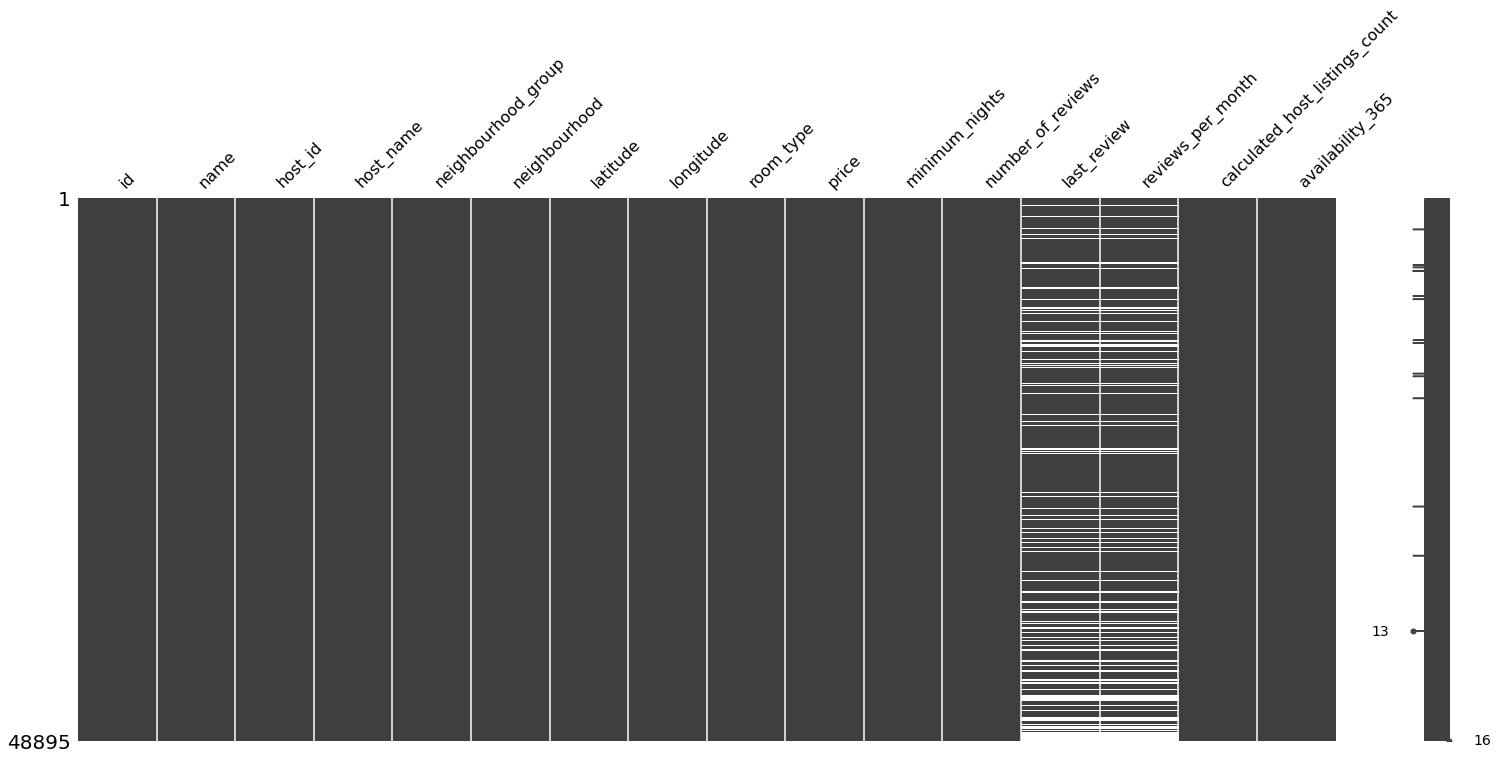

In [247]:
msno.matrix(df)   ## Used to plot the missingno matrix 
plt.show()

Taking a look at the last_review feature and checking if there are any missing values as indicated in the above plot.

In [248]:
df['last_review'][0: 10]

0    2018-10-19
1    2019-05-21
2           NaN
3    2019-07-05
4    2018-11-19
5    2019-06-22
6    2017-10-05
7    2019-06-24
8    2017-07-21
9    2019-06-09
Name: last_review, dtype: object

We also see that there are missing values in 'reviews_per_month' column. Let us now take a look at them. 

In [249]:
df['reviews_per_month'][0: 10]

0    0.21
1    0.38
2     NaN
3    4.64
4    0.10
5    0.59
6    0.40
7    3.47
8    0.99
9    1.33
Name: reviews_per_month, dtype: float64

Similarly, we would be taking a look at the host names and count the total values and check the most commonly occurring names. 

In [250]:
df['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [251]:
df['host_name'].value_counts().index[0: 20]

Index(['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground',
       'Sarah', 'Daniel', 'Jessica', 'Maria', 'Mike', 'Andrew', 'Anna',
       'Chris', 'Laura', 'Melissa', 'Emily', 'Jennifer', 'James', 'Rachel'],
      dtype='object')

In [252]:
df['host_name'].value_counts().values[0: 20]

array([417, 403, 327, 294, 279, 232, 227, 226, 205, 204, 194, 190, 187,
       182, 182, 160, 157, 154, 151, 146], dtype=int64)

In [253]:
def barplot_function(x_value, y_value, data = None, palette = 'viridis'):
    """
    Using a barplot function along with the defined data with a default palette
    to give a good pictorial representation of data. 
    """
    plt.figure(figsize = (10, 10))
    if data:
        sns.barplot(x = x_value, y = y_value, data = data, palette = palette)
    else:
        sns.barplot(x = x_value, y = y_value, data = data, palette = palette)
    plt.show()

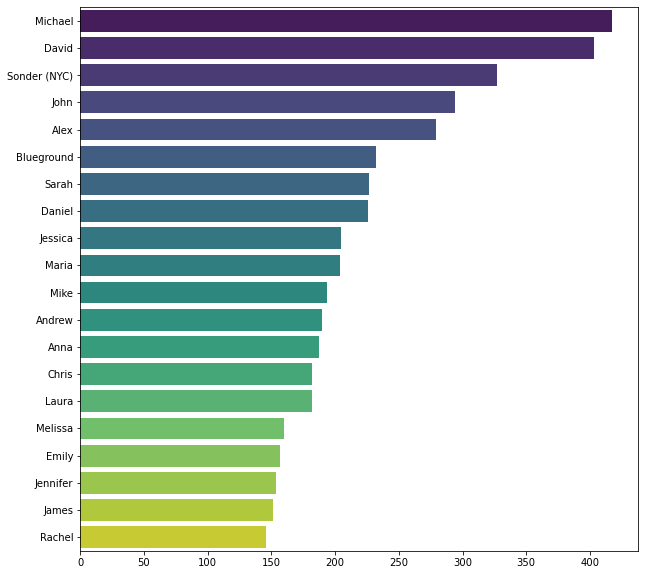

In [254]:
barplot_function(x_value = df['host_name'].value_counts().values[0: 20], y_value = df['host_name'].value_counts().index[0: 20])

In [255]:
print("The total number of differnet hosts is: {}".format(len(df['host_id'].unique())))

The total number of differnet hosts is: 37457


In [256]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [257]:
def kdeplot_function(x_value, dataset, color = 'green'):
    plt.figure(figsize = (10, 5))
    sns.kdeplot(x = x_value, data = dataset, color = color)
    plt.show()

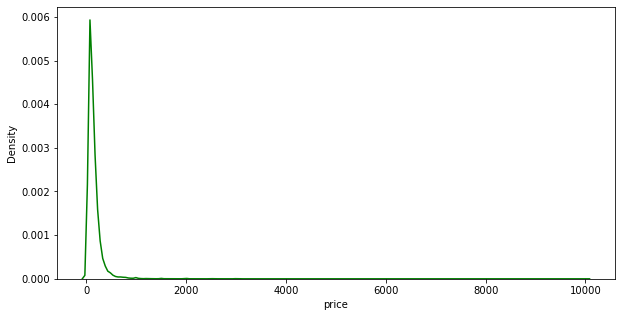

In [258]:
kdeplot_function(x_value = 'price', dataset = df)

In [259]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [260]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

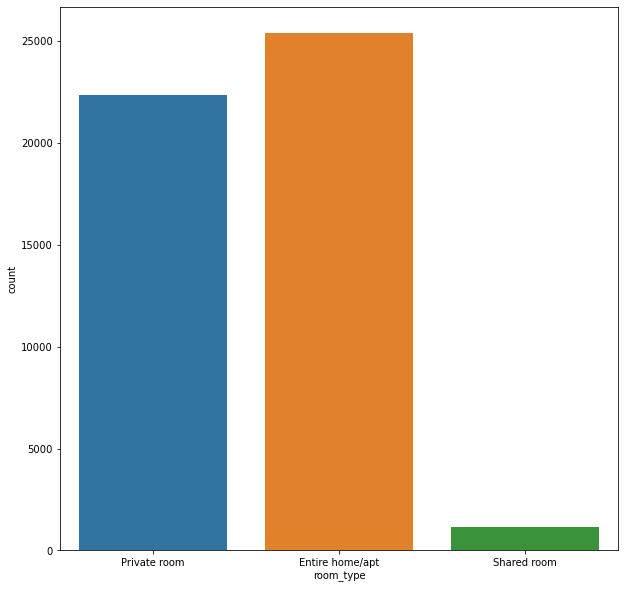

In [261]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'room_type', data = df)
plt.show()

We can also understand the commonly occurring names of the houses and their presence in our dataset. 

In [262]:
df['name'].value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

Host id would be a good way to identify the hosts present in the data as can be seen below. 

In [263]:
df['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

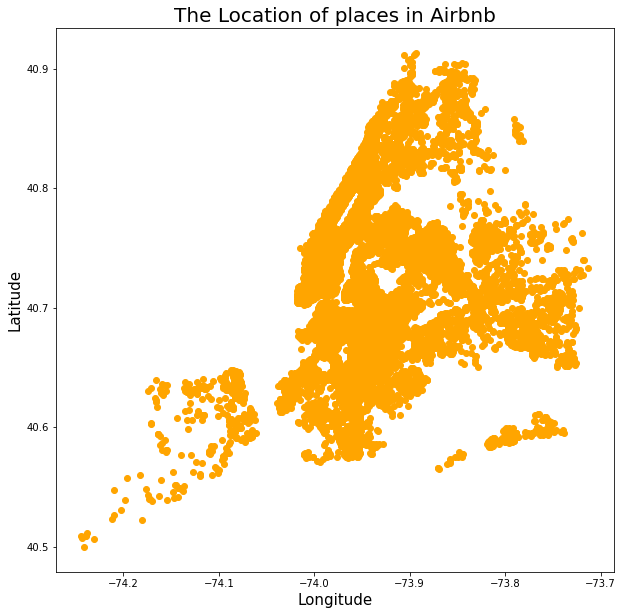

In [264]:
plt.figure(figsize = (10, 10))
plt.scatter(x = df['longitude'], y = df['latitude'], color = 'orange')
plt.xlabel("Longitude", fontsize = 15)
plt.ylabel("Latitude", fontsize = 15)
plt.title("The Location of places in Airbnb", fontsize = 20)
plt.show()

In [265]:
from termcolor import colored

In [266]:
percentage_of_missing_values = np.round(sum(df['last_review'].isna()) / len(df['last_review']) * 100, 2)
missing_values_colored = colored(percentage_of_missing_values, 'blue')
colored_feature = colored('last_review', "green")
print("The percentage of missing values for '" + colored_feature + "' feature is: {}%".format(missing_values_colored))

The percentage of missing values for 'last_review' feature is: 20.56%


In [267]:
percentage_of_missing_values = np.round(sum(df['reviews_per_month'].isna()) / len(df['reviews_per_month']) * 100, 2)
missing_values_colored = colored(percentage_of_missing_values, 'green')
colored_feature = colored('reviews_per_month', "blue")
print("The percentage of missing values for '" + colored_feature + "' feature is: {}%".format(missing_values_colored))

The percentage of missing values for 'reviews_per_month' feature is: 20.56%


In [268]:
date_split = df['last_review'].iloc[0].split('-')

In [269]:
year_first_example = date_split[0]
month_first_example = date_split[1]
day_first_example = date_split[2]

In [270]:
year_first_example

'2018'

In [271]:
month_first_example

'10'

In [272]:
day_first_example

'19'

In [273]:
def date_splitter(data, feature):
    """
    This would divide data which is a date in string format 
    to years, months and days respectively.
    
    Returns the year, month and day after splitting the data
    """
    year_list = []
    month_list = []
    day_list = []
    data_copy = data.copy()
    data_copy.dropna(inplace = True)
    for i in range(len(data_copy[feature])):
        data_split = data_copy[feature].iloc[i].split('-')
        year_list.append(data_split[0])
        month_list.append(data_split[1])
        day_list.append(data_split[2])
    return year_list, month_list, day_list

In [274]:
df_copy = df.copy()

In [275]:
years, months, days = date_splitter(df_copy, feature = 'last_review')

In [276]:
from statistics import mode

In [277]:
mode_years = mode(years)
mode_months = mode(months)
mode_days = mode(days)

In [278]:
mode_years 

'2019'

In [279]:
mode_months 

'06'

In [280]:
mode_days

'01'

In [281]:
mode_date = mode_years + '-' + mode_months + '-' + mode_days

In [282]:
mode_date

'2019-06-01'

In [283]:
import numpy as np
from sklearn.impute import SimpleImputer 

In [284]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


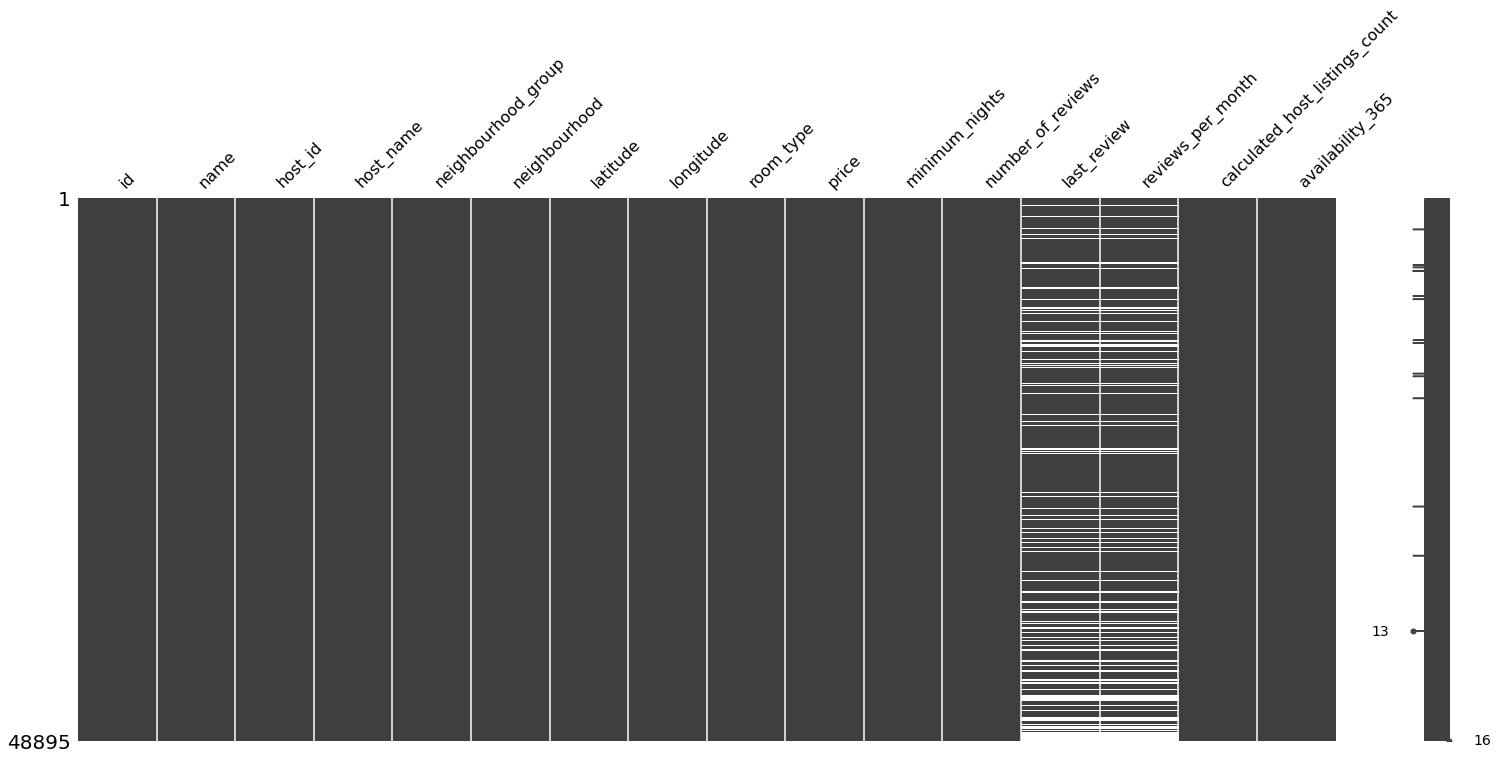

In [285]:
msno.matrix(df_copy)
plt.show()

In [286]:
df_copy['last_review'].fillna(mode_date, inplace = True) 

<AxesSubplot:>

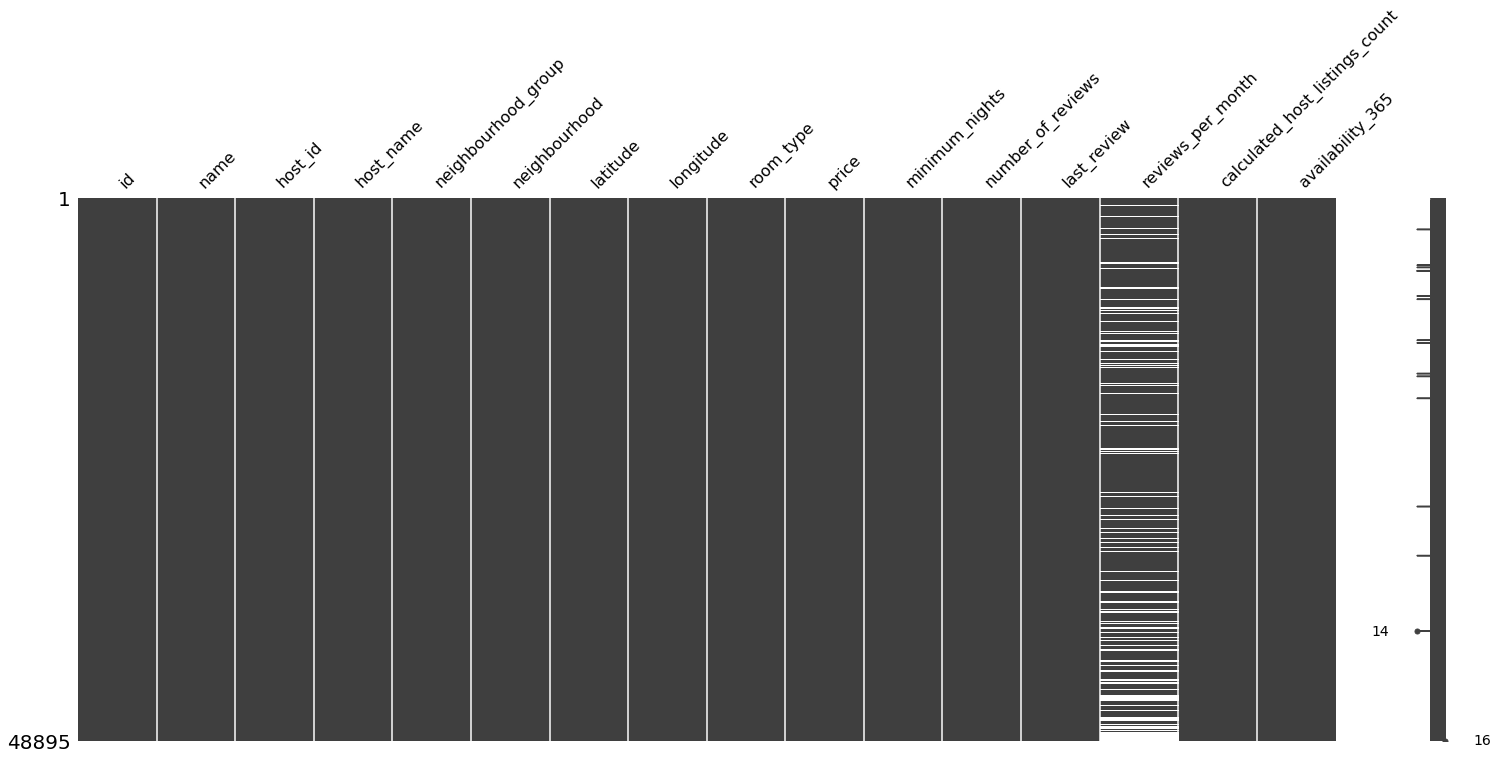

In [287]:
msno.matrix(df_copy)

In [288]:
percentage_of_missing_values = np.round(sum(df['reviews_per_month'].isna()) / len(df['reviews_per_month']) * 100, 2)
missing_values_colored = colored(percentage_of_missing_values, 'green')
colored_feature = colored('reviews_per_month', "blue")
print("The percentage of missing values for '" + colored_feature + "' feature is: {}%".format(missing_values_colored))

The percentage of missing values for 'reviews_per_month' feature is: 20.56%


In [289]:
df_copy['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

In [290]:
def mean_or_median_finder(data, feature, mean_impute = True):
    temp_data = data.copy()
    temp_data.dropna(inplace = True)
    if mean_impute: 
        mean_of_series = np.mean(temp_data[feature])
        return temp_data, mean_of_series
    else:
        median_of_series = np.median(temp_data[feature])
        return temp_data, median_of_series


In [291]:
temp_data, mean_reviews = mean_or_median_finder(df_copy, feature = 'reviews_per_month', mean_impute = True)

In [292]:
temp_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


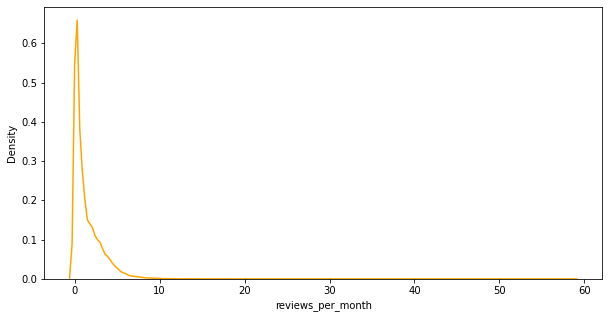

In [293]:
plt.figure(figsize = (10, 5))
sns.kdeplot(x = 'reviews_per_month', data = temp_data, color = 'orange')
plt.show()

In [294]:
temp_data, median_reviews = mean_or_median_finder(data = df_copy, feature = 'reviews_per_month', mean_impute = False)

In [295]:
median_reviews

0.72

In [296]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-01,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [297]:
df_copy['reviews_per_month'] = df_copy['reviews_per_month'].fillna(median_reviews)

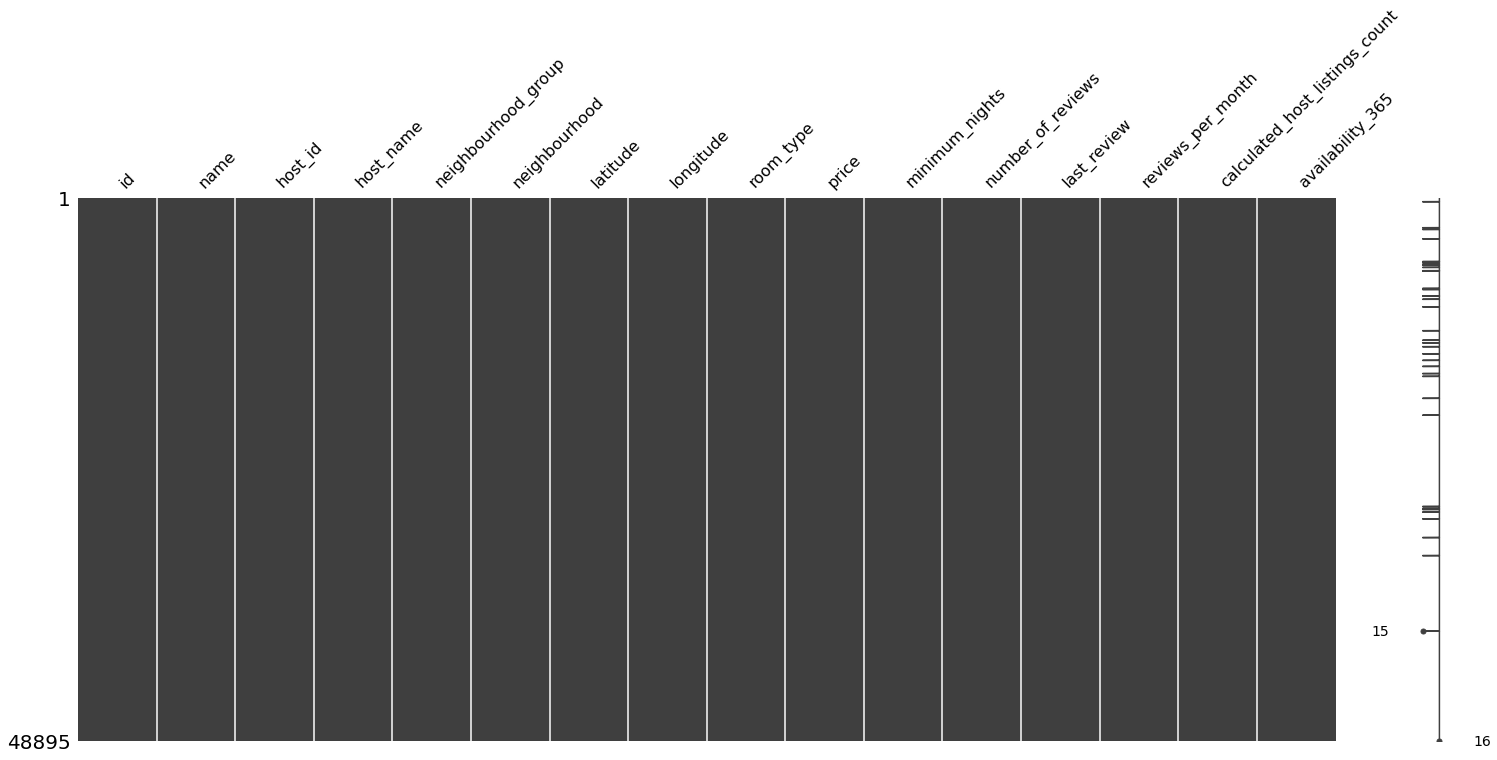

In [298]:
msno.matrix(df_copy)
plt.show()

In [299]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-01,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [300]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-01,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [301]:
df_copy['last_review_year'] = df_copy['last_review'].apply(lambda x: x[0: 4])
df_copy['last_review_month'] = df_copy['last_review'].apply(lambda x: x[5: 7])

In [302]:
df_copy['last_review_year']

0        2018
1        2019
2        2019
3        2019
4        2018
         ... 
48890    2019
48891    2019
48892    2019
48893    2019
48894    2019
Name: last_review_year, Length: 48895, dtype: object

In [303]:
df_copy['last_review_month']

0        10
1        05
2        06
3        07
4        11
         ..
48890    06
48891    06
48892    06
48893    06
48894    06
Name: last_review_month, Length: 48895, dtype: object

In [304]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,05
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-01,0.72,1,365,2019,06
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,07
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11


In [305]:
df_copy.drop('last_review', axis = 1, inplace = True)

In [306]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,2019,06
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11


In [307]:
len(df_copy['host_id'].unique())

37457

In [308]:
len(df_copy['id'].unique())

48895

In [309]:
df_copy['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

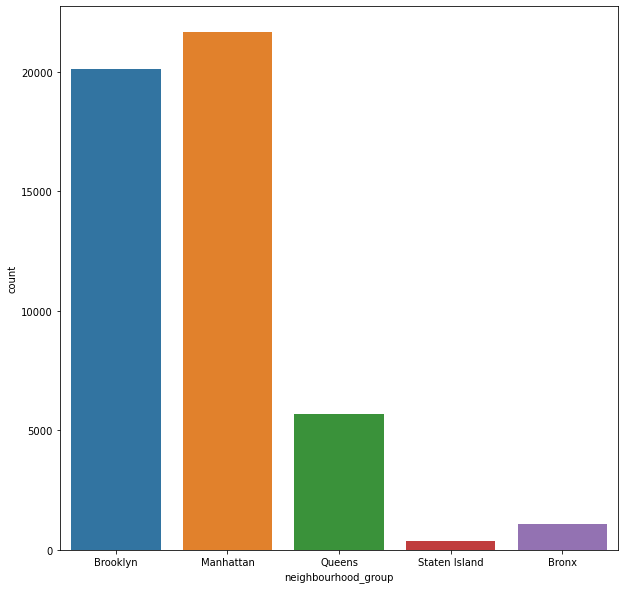

In [310]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'neighbourhood_group', data = df_copy)
plt.show()

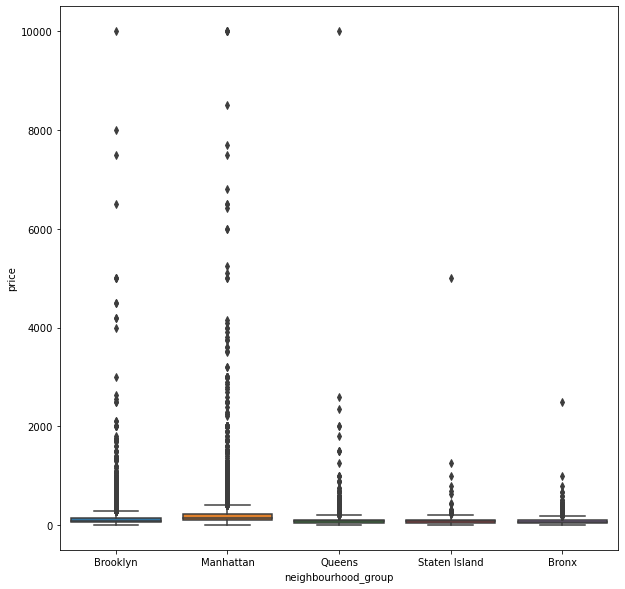

In [311]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = 'neighbourhood_group', y = 'price', data = df_copy)
plt.show()

In [312]:
np.percentile(df_copy['price'], 50)

106.0

In [313]:
np.percentile(df_copy['price'], 99)

799.0

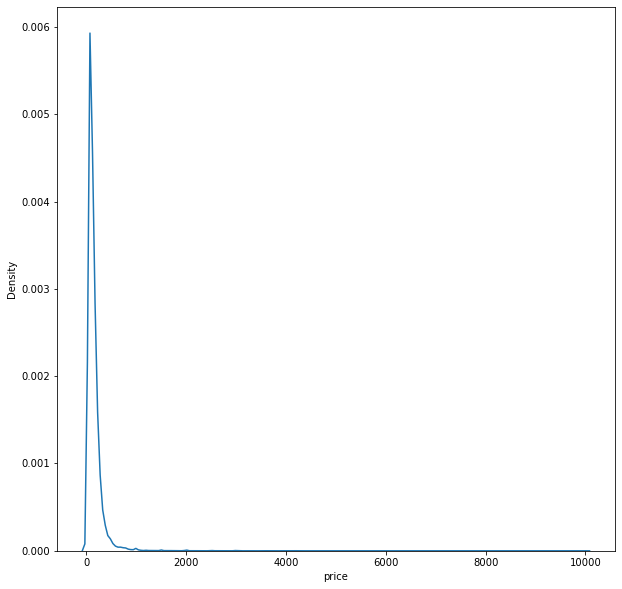

In [314]:
plt.figure(figsize = (10, 10))
sns.kdeplot(df_copy['price'])
plt.show()

In [315]:
len(df_copy['price'])

48895

In [316]:
def outliers_remover(data, feature, remove_outliers = True):
    """
    Function takes as input 'data' and the 'feature'
    which it considers to remove the outliers. 
    
    returns the outliers along with the dataset with outliers removed if remove_outliers = True
    else 
    it would only return the data without removing the outliers
    """
    
    temp_data = data.copy()
    if remove_outliers:
        outlier_points = np.percentile(df_copy[feature], 99)
        temp_data_outliers_removed = temp_data[temp_data[feature] < outlier_points]
        outliers = temp_data[temp_data[feature] > outlier_points]
        outliers_removed = len(outliers)
        print("The percentage of outliers removed: {}%".format((outliers_removed) / len(temp_data) * 100))
        return outliers, temp_data_outliers_removed
    else:
        return temp_data
    

In [317]:
outliers, df_outliers_removed = outliers_remover(df_copy, feature = 'price')

The percentage of outliers removed: 0.9694242765108907%


In [318]:
len(df_outliers_removed)

48403

In [319]:
len(outliers)

474

In [320]:
outliers.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7,2016,08
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,0.33,11,0,2018,05
662,250801,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,Greenwich Village,40.73129,-73.99944,Entire home/apt,850,3,107,1.15,1,249,2019,05
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,0.31,4,297,2018,09
780,279857,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Brooklyn,Bedford-Stuyvesant,40.68492,-73.95489,Entire home/apt,800,4,122,1.37,1,257,2019,07


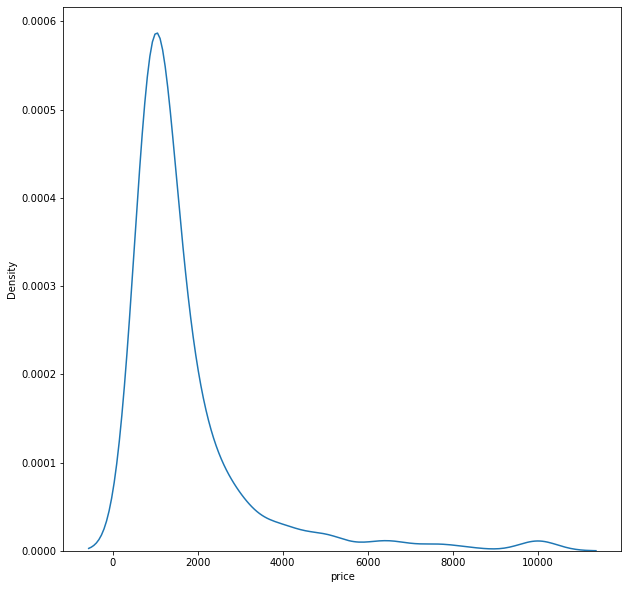

In [321]:
plt.figure(figsize = (10, 10))
sns.kdeplot(outliers['price'])
plt.show()

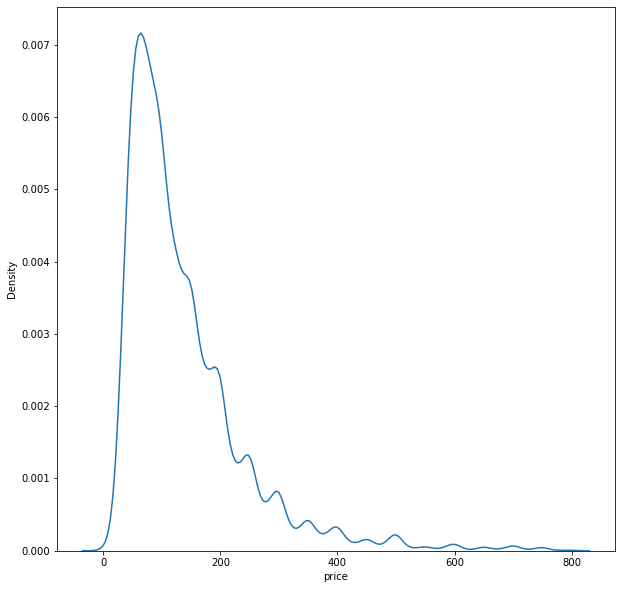

In [322]:
plt.figure(figsize = (10, 10))
sns.kdeplot(df_outliers_removed['price'])
plt.show()

In [323]:
df_copy = df_outliers_removed.copy()

In [324]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,2019,06
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11


In [325]:
df_copy.drop(['name', 'host_id', 'host_name', 'id'], axis = 1, inplace = True)

In [326]:
df_copy.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,2019,06
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11


In [327]:
df_copy.shape

(48403, 13)

In [328]:
df_copy = pd.get_dummies(df_copy, columns = ['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first = True)

# This is where we would implement Decision Trees, Random Forests and Neural Networks

In [329]:
from sklearn.model_selection import train_test_split

In [330]:
## Taking the independent variables and dropping the dependent variable
X = df_copy.drop(['price'], axis = 1)

## Taking the dependent variable that could be used later for splitting 
y = df_copy['price']

In [331]:
## Using the train test split approach to divide the overall data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [332]:

X_train.shape

(38722, 234)

In [333]:
X_test.shape

(9681, 234)

In [334]:
from sklearn.preprocessing import StandardScaler

In [335]:
scaler = StandardScaler()

In [336]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [337]:
X_train_scaled[0: 5]

array([[-0.44860626,  0.17844211, -0.04765725, ..., -0.06984847,
        -0.92386441, -0.15695699],
       [-0.7909645 , -1.00203319,  1.17662428, ..., -0.06984847,
        -0.92386441, -0.15695699],
       [ 0.51872073, -0.42762484, -0.29251356, ..., -0.06984847,
         1.08240992, -0.15695699],
       [-0.29612122, -0.12188087, -0.29251356, ..., -0.06984847,
         1.08240992, -0.15695699],
       [ 1.93818785,  0.28664512, -0.29251356, ..., -0.06984847,
         1.08240992, -0.15695699]])

# Dataset ready to train

# Decision Tree Regressor

In [338]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm

In [339]:
max_depth_values = [2, 3, 4, 5, 8, 10, 12, 15]
cross_validation_error_values = []
cv = 10
for depth in tqdm(max_depth_values):
    model = DecisionTreeRegressor()
    cross_validation_error = -cross_val_score(model, X_train_scaled, y_train, scoring = 'neg_mean_squared_error', cv = cv).mean()
    cross_validation_error_values.append(cross_validation_error)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:01<00:00,  7.70s/it]


In [340]:
def lineplot_function_tree(x_value, y_value, font_size = 15):
    plt.figure(figsize = (10, 10))
    plt.plot(x_value, y_value)
    sns.scatterplot(x = x_value, y = y_value, color = 'red')
    plt.xlabel('Max Depth Values')
    plt.ylabel('Cross Validation Error Values')
    plt.title('Max Depth Values Vs Cross Validation Error Values', fontsize = font_size)
    plt.show()

In [341]:
cross_validation_error_values

[10509.391385763221,
 10402.052146382404,
 10366.187546511608,
 10451.531648752863,
 10400.725550944182,
 10436.009755008183,
 10477.17682148131,
 10500.736886200128]

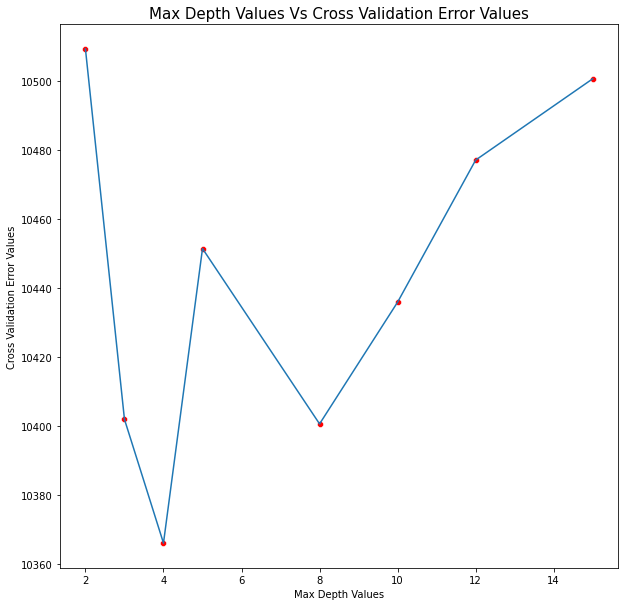

In [342]:
lineplot_function_tree(x_value = max_depth_values, y_value = cross_validation_error_values)

In [343]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score
import seaborn as sns 
from sklearn import tree

In [344]:
best_max_depth = 2

In [345]:
model = DecisionTreeRegressor(max_depth = best_max_depth)
model.fit(X_train_scaled, y_train)
y_predictions = model.predict(X_test_scaled)

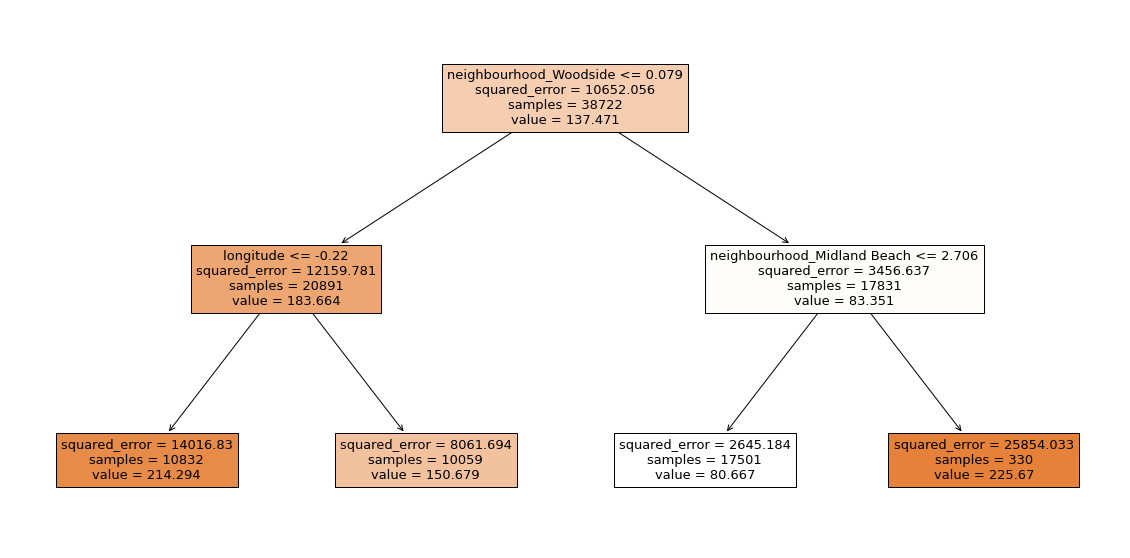

In [346]:
plt.figure(figsize = (20, 10))
tree.plot_tree(model, filled = True, feature_names = df_copy.columns)
plt.show()

In [347]:
min_samples_leaf_values = [15, 25, 50, 100, 200, 400, 1000, 2000, 5000]
MSE_values = []
cv = 10
for min_samples_leaf in tqdm(min_samples_leaf_values):
    model = DecisionTreeRegressor(min_samples_leaf = min_samples_leaf, random_state = 101)
    cross_validation_scores = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_scores)   

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:40<00:00,  4.48s/it]


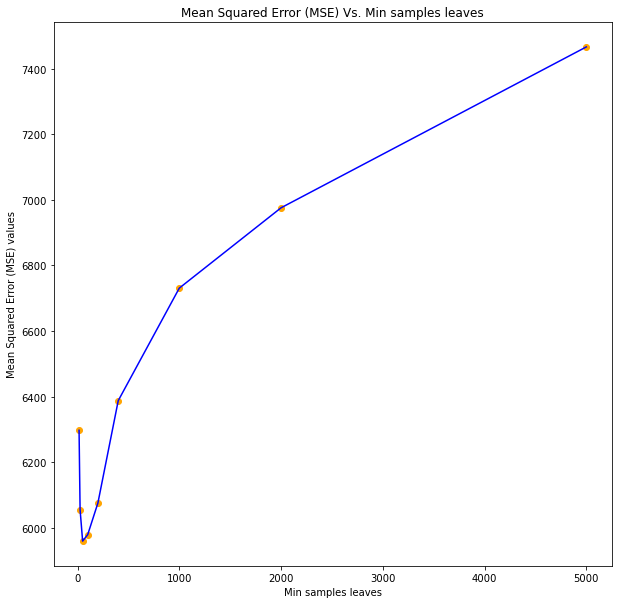

In [348]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = min_samples_leaf_values, y = MSE_values, color = 'blue')
plt.scatter(x = min_samples_leaf_values, y = MSE_values, color = 'orange')
plt.xlabel("Min samples leaves")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Min samples leaves")
plt.show()

In [350]:
## Randomly giving the split samples values for the machine learning model
min_samples_split_values = [15, 20, 50, 100, 200, 400, 500, 1000, 2000, 5000]

## Creating an empty list so that values could be added during the process of computing the cross validation error 
MSE_values = []

## Performing 10 fold cross validation 
cv = 10

## Iterating over the number of min_samples 
for min_samples in tqdm(min_samples_split_values):
    
    ##Using a decision tree regressor with min number of samples as specified in the list
    model = DecisionTreeRegressor(min_samples_split = min_samples, random_state = 101)
    
    ## Taking the average of the cross validation output values based on the mean squared error 
    cross_validation_scores = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    
    # Appending the mean squared error values from cross validation in our list we created earlier
    MSE_values.append(cross_validation_scores)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.29s/it]


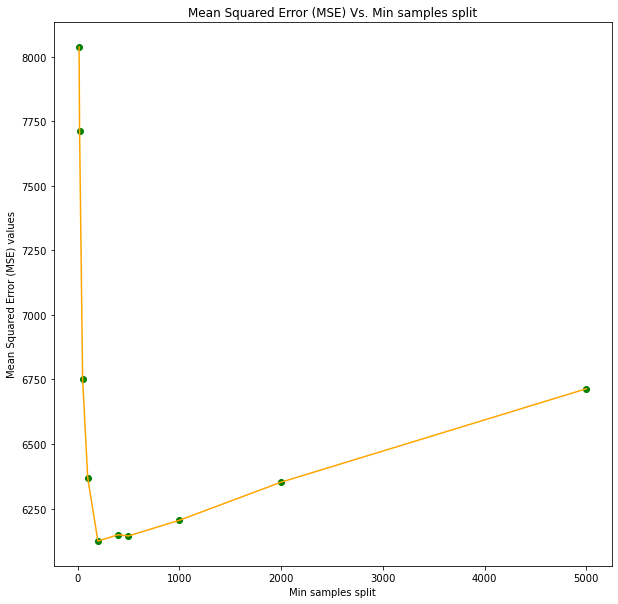

In [351]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = min_samples_split_values, y = MSE_values, color = 'orange')
plt.scatter(x = min_samples_split_values, y = MSE_values, color = 'green')
plt.xlabel("Min samples split")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Min samples split")
plt.show()

In [352]:
best_max_depth = 2
best_min_samples_split = 200
best_min_samples_leaves = 50

In [353]:
model = DecisionTreeRegressor(max_depth = best_max_depth, min_samples_split = best_min_samples_split,
                            min_samples_leaf = best_min_samples_leaves)
model.fit(X_train_scaled, y_train)
y_predictions = model.predict(X_test_scaled)

In [354]:
mean_squared_error(y_predictions, y_test)

7374.757902487385

In [355]:
mean_absolute_error(y_predictions, y_test)

55.09028473554134

In [359]:
def scatterplot_function_evaluation(x_value, y_value, fig_size = (10, 10), color = 'green', font_size = 15):
    plt.figure(figsize = fig_size)
    sns.scatterplot(x_value, y_value, color = color)
    plt.title('Y predictions Vs. Y actual', fontsize = font_size)
    plt.xlabel('Y predictions')
    plt.ylabel('Y actual')
    plt.show()

# Random Forest Regressor

In [360]:
from sklearn.ensemble import RandomForestRegressor

In [361]:
## Giving a set of values to the number of estimator values
number_of_estimator_values = [100, 200, 400, 800]

## Performing the 2 fold cross validation to reduce the computation cost for using random forest classifier
cv = 2

## Creating an empty mean squared error list so that values could be stored later
MSE_values = []

## Creating an iterator to storing the values respectively. 
for number_of_estimator in tqdm(number_of_estimator_values):
    
    ## Creating an instance of a Random Forest Regressor so that it could be used for computation of cross-validation error
    model = RandomForestRegressor(n_estimators = number_of_estimator, random_state = 101, n_jobs = -1)
    
    ## Computing the cross validation error 
    cross_validation_score = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    
    ## Appending the cross-validation error values to the list created above
    MSE_values.append(cross_validation_score)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:56<00:00, 29.00s/it]


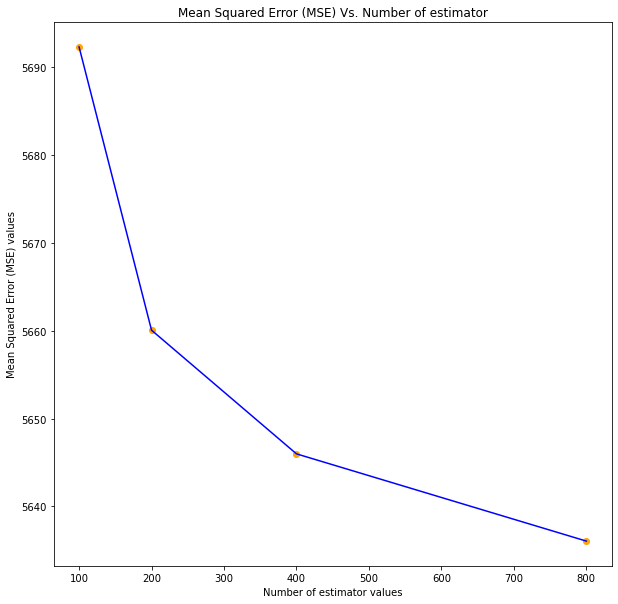

In [362]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = number_of_estimator_values, y = MSE_values, color = 'blue')
plt.scatter(x = number_of_estimator_values, y = MSE_values, color = 'orange')
plt.xlabel("Number of estimator values")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Number of estimator")
plt.show()

In [363]:
number_of_features_values = [1, 10, 12, 15, 20, 50, 100]
MSE_values = []
for number_of_features in tqdm(number_of_features_values):
    model = RandomForestRegressor(max_features = number_of_features, random_state = 101, n_jobs = -1)
    cross_validation_score = -cross_val_score(model, X_train_scaled, y_train, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_score)
    

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:32<00:00, 13.20s/it]


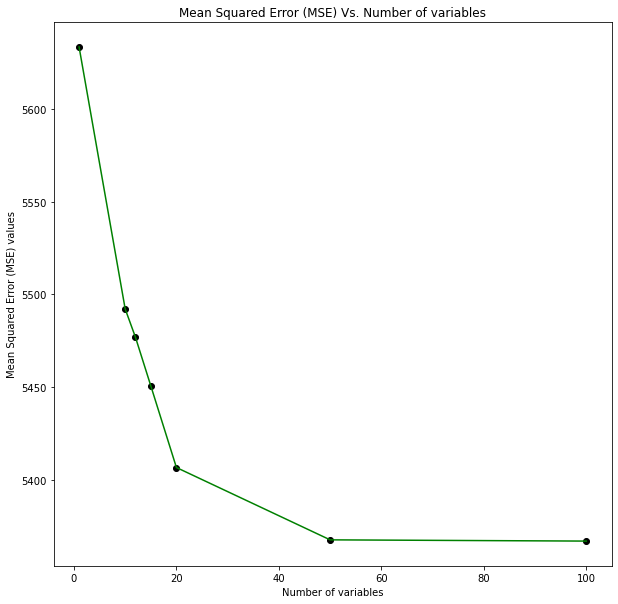

In [364]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = number_of_features_values, y = MSE_values, color = 'green')
plt.scatter(x = number_of_features_values, y = MSE_values, color = 'black')
plt.xlabel("Number of variables")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Number of variables")
plt.show()

In [365]:
best_number_of_estimators = 800
best_number_of_features = 50

In [366]:
## This cell might be a bit computationally expensive
## However, it is generating good results for the prediction and a good reduction in the mean squared error 

model = RandomForestRegressor(max_features = best_number_of_features, n_estimators = best_number_of_estimators, n_jobs = -1)
model.fit(X_train_scaled, y_train)
y_predictions = model.predict(X_test_scaled)

In [367]:
mean_squared_error(y_predictions, y_test)

5284.628019424772

In [368]:
mean_absolute_error(y_predictions, y_test)

44.01375534767414

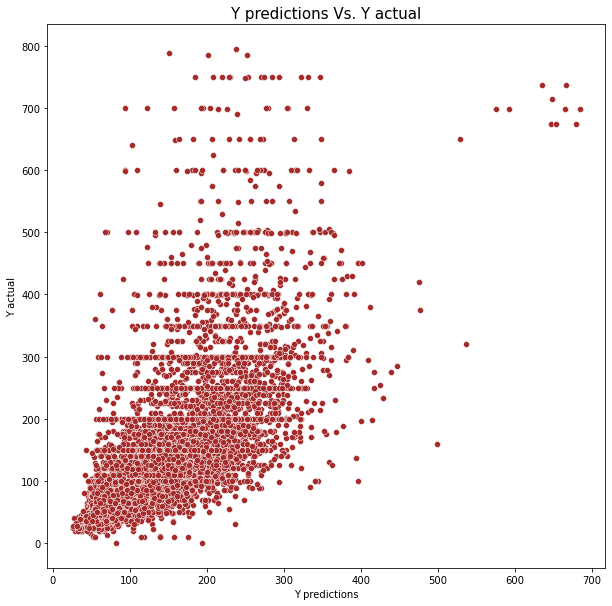

In [369]:
scatterplot_function_evaluation(y_predictions, y_test, color = 'brown', )

# Gradient Boosting Regressor

Note: This model takes a long time to run. Feel free to take a look at the output. 


In [370]:
from sklearn.ensemble import GradientBoostingRegressor

In [372]:
## This code was taken from the key insights from the previous assignment of the Supervised Machine Learning course
## The set of values for the number of estimators
n_estimators = [10, 25, 50, 100, 150, 200]

## Defining the folds for cross-validation 
cv = 2

## Creating an empty list for storing the cross-validation values
cross_validation_score_values = []

## Iterating over all the elements from n_estimators
for estimators in tqdm(n_estimators):
    
    ## Fitting the gradient boosting decision tree for a particular number of estimators
    model = GradientBoostingRegressor(n_estimators = estimators)
    
    ## Taking the mean of the cross validation score for k folds 
    cross_validation_score = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    cross_validation_score_values.append(cross_validation_score)
    

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:31<00:00, 25.18s/it]


In [373]:
def lineplot_function(x_label, y_label, x_value, y_value, color1 = 'green', color2 = 'blue', figsize = (10, 10)):
    """
    Takes the x values and y values and plots the lineplot along with scatterplot
    """
    plt.figure(figsize = figsize)
    sns.lineplot(x = x_value, y = y_value, color = color1)
    sns.scatterplot(x = x_value, y = y_value, color = color2)
    plt.xlabel(x_label, fontsize = 10)
    plt.ylabel(y_label, fontsize = 10)
    plt.title(f'{x_label} Vs. {y_label} values', fontsize = 15)
    plt.show()

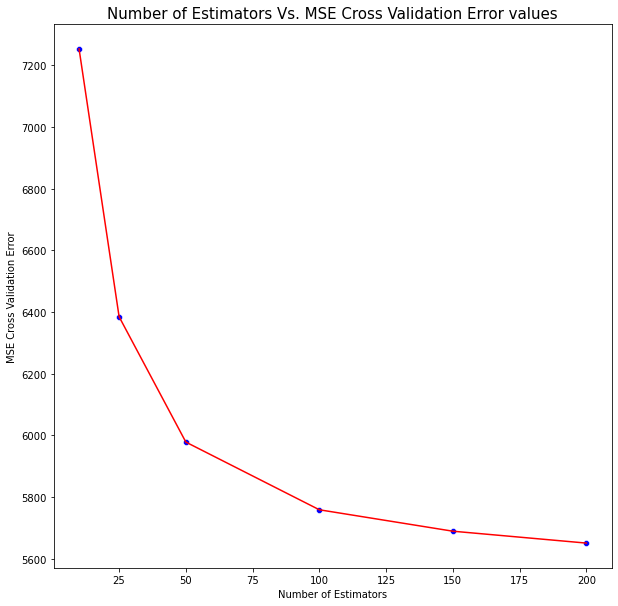

In [374]:
lineplot_function(x_value = n_estimators, y_value = cross_validation_score_values, x_label = "Number of Estimators",
                 y_label = "MSE Cross Validation Error", color1 = "red")

In [375]:
## Similarly, we would be iterating over the depth of the trees for each estimator
max_depth_values = [1, 2, 3, 5, 7, 10]

## We would be performing the k-fold cross validation 
cv = 10

## Adding a list which could be accessed later
cross_validation_score_values = []

## Iterating over the max_depth values that we have created earlier
for max_depth in tqdm(max_depth_values):
    
    ## Setting the max_depth for the gradient boosting regressor model
    model = GradientBoostingRegressor(max_depth = max_depth, n_estimators = 10)
    
    ## Taking the average of the cross validation errors after performing the k-fold cross validation
    cross_validation_score = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    cross_validation_score_values.append(cross_validation_score)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:24<00:00, 34.11s/it]


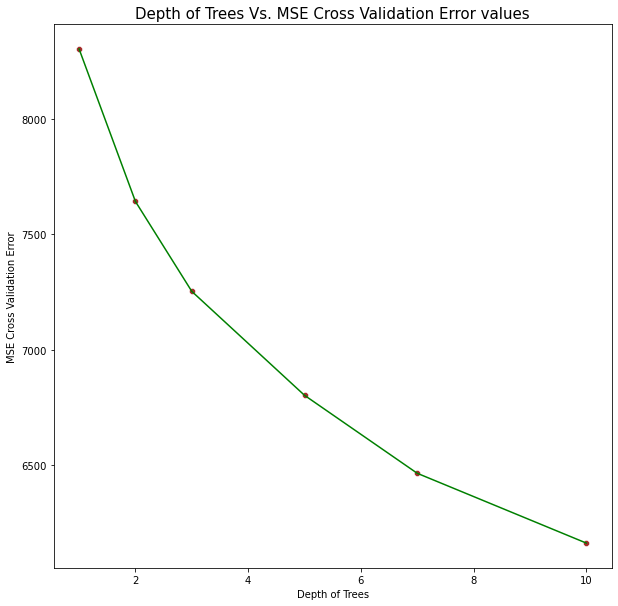

In [376]:
## Using the lineplot function to plot the performance measures of the gradient boosting regressor algorithm
lineplot_function(x_value = max_depth_values, y_value = cross_validation_score_values, x_label = "Depth of Trees",
                 y_label = "MSE Cross Validation Error", color1 = "green", color2 = "brown")

In [377]:
best_max_depth = 10
best_estimators = 200

In [378]:
model = GradientBoostingRegressor(n_estimators = best_estimators, max_depth = 10)
model.fit(X_train_scaled, y_train)
y_predictions = model.predict(X_test_scaled)

In [379]:
mean_squared_error(y_predictions, y_test)

5464.3085936890775

In [380]:
mean_absolute_error(y_predictions, y_test)

45.018659885689104

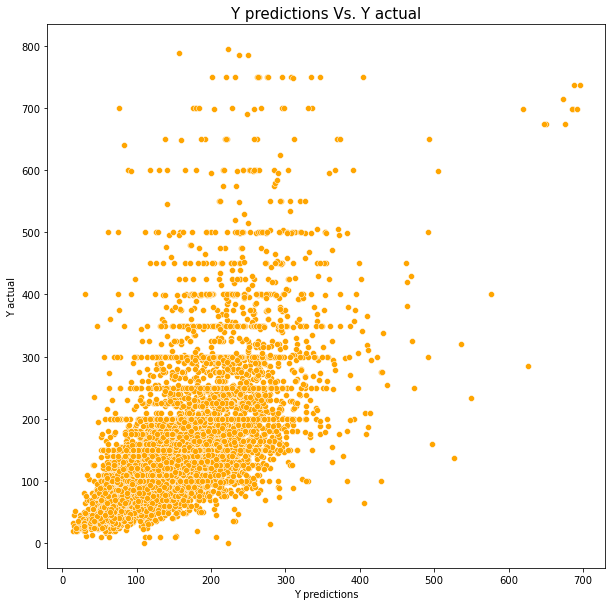

In [381]:
scatterplot_function_evaluation(y_predictions, y_test, color = 'orange')

# Deep Learning Model

We would be using deep learning models with different architectures and dropouts to see which would would reduce the mean squared error significantly. 

In [382]:
from tensorflow.keras.layers import Dense, Dropout  ## Libraries from Keras which could be used for dropout and dense layers
from tensorflow.keras.models import Sequential  ## We would be using the sequential layers

In [383]:
n_columns = len(X_train_scaled[0])

In [384]:
## Creating a sequential instance 
model = Sequential()

## Creating a hidden layer of size 100 and activation to be relu
model.add(Dense(100, activation = 'relu', input_shape = (n_columns,)))

## Creating a hidden layer of size 50 and activation to be relu 
model.add(Dense(50, activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))

## Creating a densely connected layer with one unit as the output and the activation is linear 
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [385]:
model.fit(X_train, y_train, epochs = 10, batch_size = 10)

Train on 38722 samples
Epoch 1/10
38722/38722 [==============================] - 4s 104us/sample - loss: 10167.2300 - mean_absolute_error: 70.6396
Epoch 2/10
38722/38722 [==============================] - 4s 100us/sample - loss: 7509.6077 - mean_absolute_error: 56.5416
Epoch 3/10
38722/38722 [==============================] - 4s 101us/sample - loss: 6834.2877 - mean_absolute_error: 53.2002
Epoch 4/10
38722/38722 [==============================] - 4s 101us/sample - loss: 6675.5482 - mean_absolute_error: 52.0165s - loss: 6607
Epoch 5/10
38722/38722 [==============================] - 4s 101us/sample - loss: 6582.1186 - mean_absolute_error: 51.2828
Epoch 6/10
38722/38722 [==============================] - 4s 100us/sample - loss: 6496.1105 - mean_absolute_error: 50.8202
Epoch 7/10
38722/38722 [==============================] - 4s 101us/sample - loss: 6449.6020 - mean_absolute_error: 50.5288
Epoch 8/10
38722/38722 [==============================] - 4s 101us/sample - loss: 6420.9368 - mean_ab

In [386]:
y_predictions = model.predict(X_test)

In [387]:
mean_squared_error(y_predictions, y_test)

6282.542245585716

In [388]:
mean_absolute_error(y_predictions, y_test)

53.758947518428194

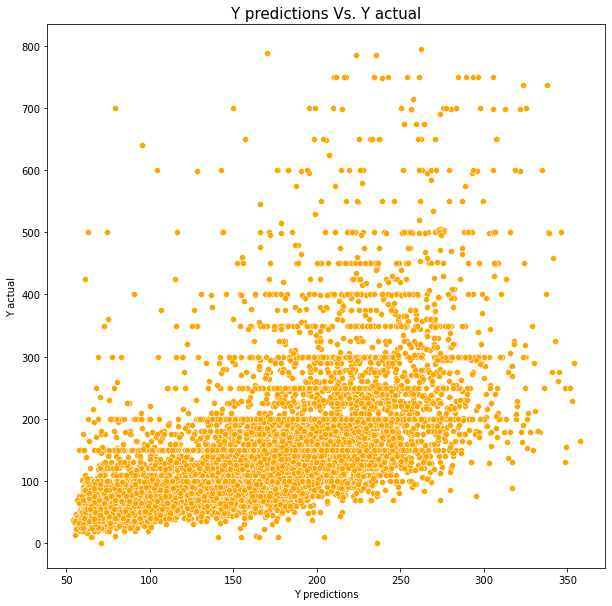

In [389]:
scatterplot_function_evaluation(y_predictions.flatten(), y_test, color = 'orange')

In [390]:
## Creating a sequential instance 
model = Sequential()

## Creating a hidden layer of size 100 and activation to be relu
model.add(Dense(100, activation = 'relu', input_shape = (n_columns,)))

## Creating a hidden layer of size 50 and activation to be relu 
model.add(Dense(50, activation = 'relu'))

## Adding an extra hidden layer containing 10 hidden units to see the reduction in the mean squared error
model.add(Dense(10, activation = 'relu'))

## Creating a densely connected layer with one unit as the output and the activation is linear 
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [391]:
model.fit(X_train, y_train, epochs = 10, batch_size = 10)

Train on 38722 samples
Epoch 1/10
38722/38722 [==============================] - 4s 107us/sample - loss: 10080.0630 - mean_absolute_error: 70.4647
Epoch 2/10
38722/38722 [==============================] - 4s 109us/sample - loss: 7468.6056 - mean_absolute_error: 56.1582
Epoch 3/10
38722/38722 [==============================] - 4s 107us/sample - loss: 6866.9046 - mean_absolute_error: 52.9163
Epoch 4/10
38722/38722 [==============================] - 4s 103us/sample - loss: 6681.7293 - mean_absolute_error: 51.7351
Epoch 5/10
38722/38722 [==============================] - 4s 105us/sample - loss: 6594.4974 - mean_absolute_error: 51.1732
Epoch 6/10
38722/38722 [==============================] - 4s 107us/sample - loss: 6561.3537 - mean_absolute_error: 50.9806
Epoch 7/10
38722/38722 [==============================] - 4s 104us/sample - loss: 6451.7606 - mean_absolute_error: 50.3857
Epoch 8/10
38722/38722 [==============================] - 4s 104us/sample - loss: 6422.6682 - mean_absolute_error: 

In [392]:
y_predictions = model.predict(X_test)

In [393]:
mean_squared_error(y_predictions, y_test)

6150.774237372379

In [394]:
mean_absolute_error(y_predictions, y_test)

47.79464839261101

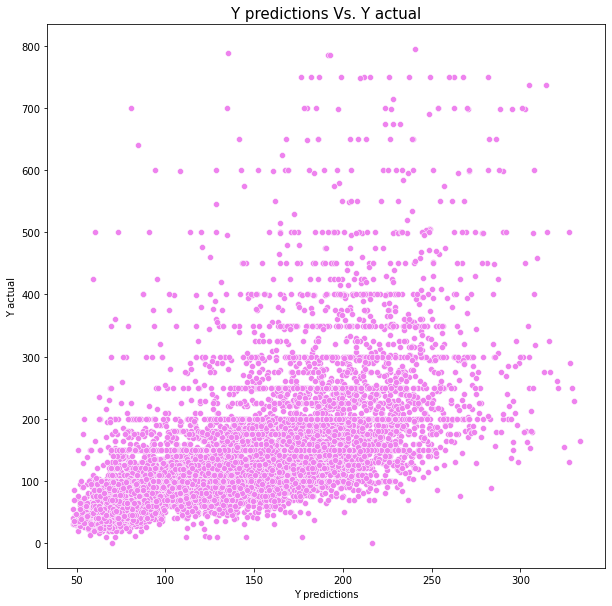

In [395]:
scatterplot_function_evaluation(y_predictions.flatten(), y_test, color = 'violet')